<a href="https://colab.research.google.com/github/MuhammadAdhikaIsaNugraha/Machine_Learning_2023/blob/main/Pembelajaran_Mesin_Week_7(12_Muhammad_Adhika_Isa_Nugraha_2141720267).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12/Muhammad Adhika Isa Nugraha/2141720267**

---



# **Job Sheet 7: Clustering**

---



# Lab Assignment Week 7

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.__version__

'1.23.5'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_7/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_7/Mall_Customers.csv')
df.drop(["CustomerID"], axis = 1, inplace=True)

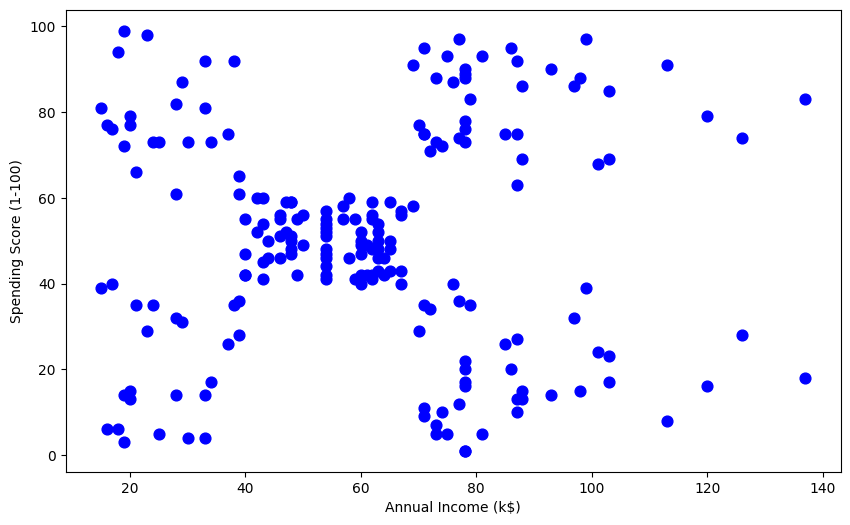

In [ ]:
# Drop the 'Age' column
df_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Create a new figure for the 2D scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot in 2D
plt.scatter(df_2d['Annual Income (k$)'],
            df_2d['Spending Score (1-100)'], c='blue', s=60)

# Set plot labels
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

# Show the 2D scatter plot
plt.show()

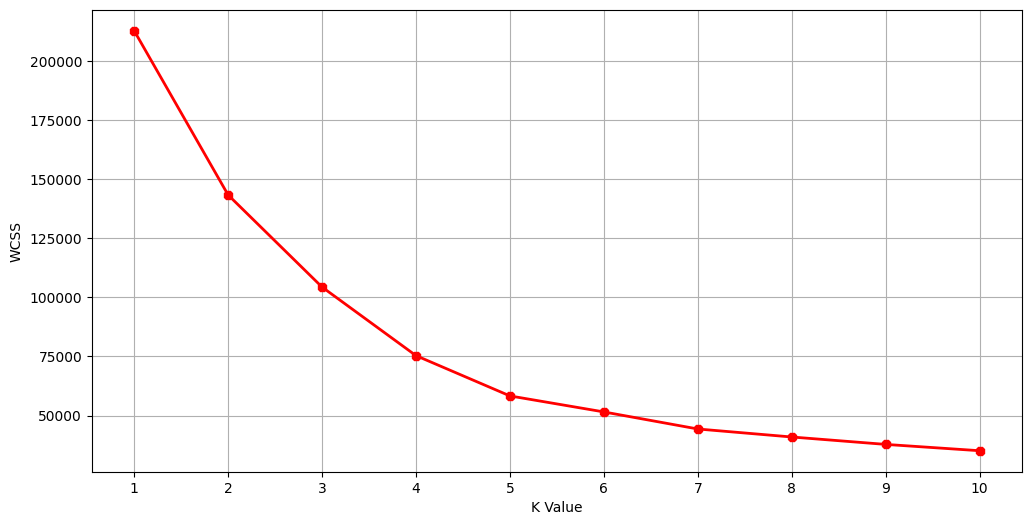

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

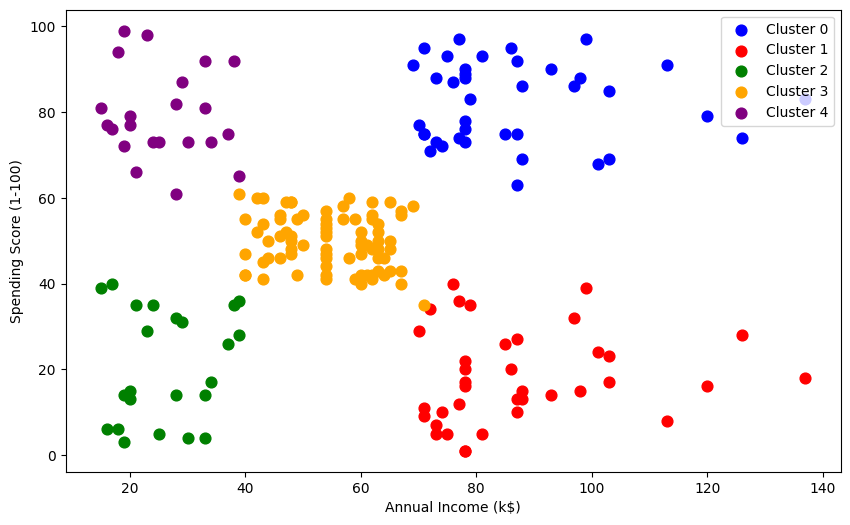

In [ ]:
# Assuming you already have the 'df' DataFrame and 'clusters' from K-Means clustering

# Create a new figure for the 2D scatter plot
plt.figure(figsize=(10, 6))

# Define the colors for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Scatter plot for each cluster
for cluster_label, color in zip(range(5), colors):
    plt.scatter(df["Annual Income (k$)"][df.label == cluster_label], df["Spending Score (1-100)"]
                [df.label == cluster_label], c=color, s=60, label=f'Cluster {cluster_label}')

# Set plot labels and legend
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc='upper right')

# Show the 2D scatter plot
plt.show()

1. Create a K-Means model with the following conditions: Use the 'Mall_Customers.csv' data.
2. Determine the appropriate features for clustering (at least 2).
3. Create a K-Means model considering the best number of clusters.
4. Reimplement the model by using SOM.